In [1]:
#@title Twitter Auth Token

twitter_auth_token = '4fddaee47cdb46cde384f4d86c93d502a97978c1'

In [2]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [52.9 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,756 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,036 kB]
Hit:13 https://ppa.launchpadcontent.n

**1. CRAWLING DATA**

In [4]:
# Crawl Data

filename = 'data_cakap.csv'
search_keyword = 'aplikasi cakap belajar bahasa'
limit = 10000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.0]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/data_cakap.csv, renaming to ./tweets-data/data_cakap.old.csv

-- Scrolling... (1) (2) (3)
Filling in keywords: aplikasi cakap belajar bahasa

 (4)

Your tweets saved to: /content/tweets-data/data_cakap.csv
Total tweets saved: 19

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/data_cakap.csv
Total tweets saved: 39

-- Scrolling... (1) (2) (3)

Your tweets saved to: /content/tweets-data/data_cakap.csv
Total tweets saved: 59

-- Scrolling... (1) (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) (12) (13) (14) (15) (16) (17) (18) (19) (20) (21)No more tweets found, pl

In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen Aplikasi Cakap/data_cakap.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1293487362215825409,Wed Aug 12 09:59:53 +0000 2020,226,Hari ini PP the Jakmania bekerjasama dengan Ca...,1293487362215825409,https://pbs.twimg.com/media/EfNj5mvUEAAacp8.jpg,NaN,in,"ÜT: -6.207942,106.84446",25,22,127,https://twitter.com/DikySoemarno/status/129348...,70896472,DikySoemarno
1,1708325366954131803,Sun Oct 01 03:38:01 +0000 2023,237,Dengan adanya kerjasama ini Florisen dan @caka...,1708325366954131803,https://pbs.twimg.com/media/F7Uw1xfXYAALFYw.jpg,NaN,in,Dunia Flora,21,14,68,https://twitter.com/FloRisenID/status/17083253...,1153035835370962944,FloRisenID
2,1620706094275526656,Wed Feb 01 08:50:18 +0000 2023,139,Dengan bangga kami mengumumkan Official Suppor...,1620706094275526656,https://pbs.twimg.com/media/Fn3nmggaYAAAts0.jpg,NaN,in,"Kota Surabaya, Jawa Timur",8,11,37,https://twitter.com/ligapersebaya/status/16207...,1377462589190328325,ligapersebaya
3,1525707600972500992,Sun May 15 05:20:13 +0000 2022,8,Host kita kewalahan nih anaknya jago bahasa In...,1525707600972500992,https://pbs.twimg.com/media/FSxm9iaaUAEToV9.jpg,NaN,in,NaN,0,0,1,https://twitter.com/netmediatama/status/152570...,978808357,netmediatama
4,1215136237968773121,Thu Jan 09 05:00:29 +0000 2020,4,Mau #TerusBergerakMaju belajar bahasa asing di...,1215136237968773121,https://pbs.twimg.com/ext_tw_video_thumb/12151...,NaN,in,Indonesia,0,0,1,https://twitter.com/Telkomsel/status/121513623...,255409050,Telkomsel


In [7]:
df = df[['created_at', 'full_text', 'username']]
df

,created_at,full_text,username
0,Wed Aug 12 09:59:53 +0000 2020,Hari ini PP the Jakmania bekerjasama dengan Ca...,DikySoemarno
1,Sun Oct 01 03:38:01 +0000 2023,Dengan adanya kerjasama ini Florisen dan @caka...,FloRisenID
2,Wed Feb 01 08:50:18 +0000 2023,Dengan bangga kami mengumumkan Official Suppor...,ligapersebaya
3,Sun May 15 05:20:13 +0000 2022,Host kita kewalahan nih anaknya jago bahasa In...,netmediatama
4,Thu Jan 09 05:00:29 +0000 2020,Mau #TerusBergerakMaju belajar bahasa asing di...,Telkomsel
5,Thu Dec 26 13:39:16 +0000 2019,Mau #TerusBergerakMaju belajar bahasa asing di...,Telkomsel
6,Fri Nov 29 10:03:37 +0000 2019,Cakap Luncurkan Fitur Belajar Bahasa Jepang Be...,SIARnews
7,Thu Jan 16 04:43:04 +0000 2020,Startup Cakap Dorong Masyarakat NTT Tingkatkan...,SIARnews
8,Thu Aug 04 07:23:40 +0000 2022,Chit chat with and old EXO-L she's follow them...,kyuddn
9,Sat Jan 30 05:26:16 +0000 2021,Bekerja Sama dengan Aplikasi Cakap Organisasi ...,idn_channel


**2. CLEANING DATA**

In [8]:
df.shape

(59, 3)

In [9]:
df = df.drop_duplicates(subset=['full_text'])

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

created_at    0
full_text     0
username      0
dtype: int64

In [13]:
df.shape

(59, 3)

In [14]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # menghapus mention
  text = re.sub(r'#\w+', '', text) # menghapus hashtag
  text = re.sub(r'RT[\s]+', '', text) # menghapus RT
  text = re.sub(r'https?://\S+', '', text) # menghapus URL
  text = re.sub(r'[^A-Za-z0-9 ]', '', text) # menghapus alphanumerik
  # text = re.sub(r'\s+', ' ', text).strip() # menghapus spasi berlebihan

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [16]:
df ['full_text'] = df['full_text'].str.lower()
df

,created_at,full_text,username
0,Wed Aug 12 09:59:53 +0000 2020,hari ini pp the jakmania bekerjasama dengan ca...,DikySoemarno
1,Sun Oct 01 03:38:01 +0000 2023,dengan adanya kerjasama ini florisen dan akan...,FloRisenID
2,Wed Feb 01 08:50:18 +0000 2023,dengan bangga kami mengumumkan official suppor...,ligapersebaya
3,Sun May 15 05:20:13 +0000 2022,host kita kewalahan nih anaknya jago bahasa in...,netmediatama
4,Thu Jan 09 05:00:29 +0000 2020,mau belajar bahasa asing di mana aja dan kapa...,Telkomsel
5,Thu Dec 26 13:39:16 +0000 2019,mau belajar bahasa asing di mana aja dan kapa...,Telkomsel
6,Fri Nov 29 10:03:37 +0000 2019,cakap luncurkan fitur belajar bahasa jepang be...,SIARnews
7,Thu Jan 16 04:43:04 +0000 2020,startup cakap dorong masyarakat ntt tingkatkan...,SIARnews
8,Thu Aug 04 07:23:40 +0000 2022,chit chat with and old exol shes follow them s...,kyuddn
9,Sat Jan 30 05:26:16 +0000 2021,bekerja sama dengan aplikasi cakap organisasi ...,idn_channel


**3. Preprocessing Data**

In [17]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [20]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["gw", "yg"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df ['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,created_at,full_text,username
0,Wed Aug 12 09:59:53 +0000 2020,hari pp the jakmania bekerjasama cakap aplikas...,DikySoemarno
1,Sun Oct 01 03:38:01 +0000 2023,adanya kerjasama florisen membagikan 1400 vou...,FloRisenID
2,Wed Feb 01 08:50:18 +0000 2023,bangga mengumumkan official supporting partner...,ligapersebaya
3,Sun May 15 05:20:13 +0000 2022,host kewalahan nih anaknya jago bahasa inggris...,netmediatama
4,Thu Jan 09 05:00:29 +0000 2020,mau belajar bahasa asing mana aja kapan aja p...,Telkomsel
5,Thu Dec 26 13:39:16 +0000 2019,mau belajar bahasa asing mana aja kapan aja a...,Telkomsel
6,Fri Nov 29 10:03:37 +0000 2019,cakap luncurkan fitur belajar bahasa jepang be...,SIARnews
7,Thu Jan 16 04:43:04 +0000 2020,startup cakap dorong masyarakat ntt tingkatkan...,SIARnews
8,Thu Aug 04 07:23:40 +0000 2022,chit chat with and old exol shes follow them s...,kyuddn
9,Sat Jan 30 05:26:16 +0000 2021,bekerja sama aplikasi cakap organisasi ntt mud...,idn_channel


In [21]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0     [hari, pp, the, jakmania, bekerjasama, cakap, ...
1     [adanya, kerjasama, florisen, membagikan, 1400...
2     [bangga, mengumumkan, official, supporting, pa...
3     [host, kewalahan, nih, anaknya, jago, bahasa, ...
4     [mau, belajar, bahasa, asing, mana, aja, kapan...
5     [mau, belajar, bahasa, asing, mana, aja, kapan...
6     [cakap, luncurkan, fitur, belajar, bahasa, jep...
7     [startup, cakap, dorong, masyarakat, ntt, ting...
8     [chit, chat, with, and, old, exol, shes, follo...
9     [bekerja, sama, aplikasi, cakap, organisasi, n...
10    [nongki, berfaedah, belajar, bahasa, asing, pa...
11    [mau, skill, bahasa, inggris, kamu, lebih, jau...
12    [cakap, terapkan, metode, belajar, ampuh, bela...
13    [sobat, cakap, mau, kamu, leyehleyeh, rumah, a...
14    [jago, bahasa, asing, ribet, belajar, bahasa, ...
15    [berdiri, sejak, tahun, 2014, squline, mengumu...
16    [menghabiskan, waktu, menonton, film, serial, ...
17    [buat, kamu, bekerja, perusahaan, multinas

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen Aplikasi Cakap/hasil_Preprocessing_Data.csv", index=False)

**4. TRANSLATE**

In [27]:
!pip install translate

In [28]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen Aplikasi Cakap/hasil_Preprocessing_Data.csv", encoding='latin1')
data.head()

,full_text
0,hari pp the jakmania bekerjasama cakap aplikas...
1,ada kerjasama florisen bagi 1400 voucher ajar ...
2,bangga umum official supporting partner liga b...
3,host kewalahan nih anak jago bahasa inggris un...
4,mau ajar bahasa asing mana aja kapan aja pake ...


In [29]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen Aplikasi Cakap/hasil_translate_cakap.csv")

**5. LABELING**

In [30]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen Aplikasi Cakap/hasil_translate_cakap.csv", index_col=0)
data

,full_text,tweet_english
0,hari pp the jakmania bekerjasama cakap aplikas...,day pp the jakmania cooperates proficiently vi...
1,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...
2,bangga umum official supporting partner liga b...,proud of the general official supporting partn...
3,host kewalahan nih anak jago bahasa inggris un...,"the host is overwhelmed, the child is a champi..."
4,mau ajar bahasa asing mana aja kapan aja pake ...,want to teach any foreign language at any time...
5,mau ajar bahasa asing mana aja kapan aja aktif...,want to teach any foreign language at any time...
6,cakap luncur fitur ajar bahasa jepang kelompok...,skateboarding japanese tutoring feature price ...
7,startup cakap dorong masyarakat ntt tingkat ma...,startups say encourage people to be able to sp...
8,chit chat with and old exol shes follow them s...,chit chat with and old exol shes follow them s...
9,kerja sama aplikasi cakap organisasi ntt muda ...,cooperation application talk organization ntt ...


In [31]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 34
Netral = 11
Negatif = 14

Total Data : 59


In [34]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,hari pp the jakmania bekerjasama cakap aplikas...,day pp the jakmania cooperates proficiently vi...,Negatif
1,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...,Positif
2,bangga umum official supporting partner liga b...,proud of the general official supporting partn...,Positif
3,host kewalahan nih anak jago bahasa inggris un...,"the host is overwhelmed, the child is a champi...",Positif
4,mau ajar bahasa asing mana aja kapan aja pake ...,want to teach any foreign language at any time...,Negatif
5,mau ajar bahasa asing mana aja kapan aja aktif...,want to teach any foreign language at any time...,Negatif
6,cakap luncur fitur ajar bahasa jepang kelompok...,skateboarding japanese tutoring feature price ...,Negatif
7,startup cakap dorong masyarakat ntt tingkat ma...,startups say encourage people to be able to sp...,Positif
8,chit chat with and old exol shes follow them s...,chit chat with and old exol shes follow them s...,Positif
9,kerja sama aplikasi cakap organisasi ntt muda ...,cooperation application talk organization ntt ...,Positif


**6. Visualisasi**

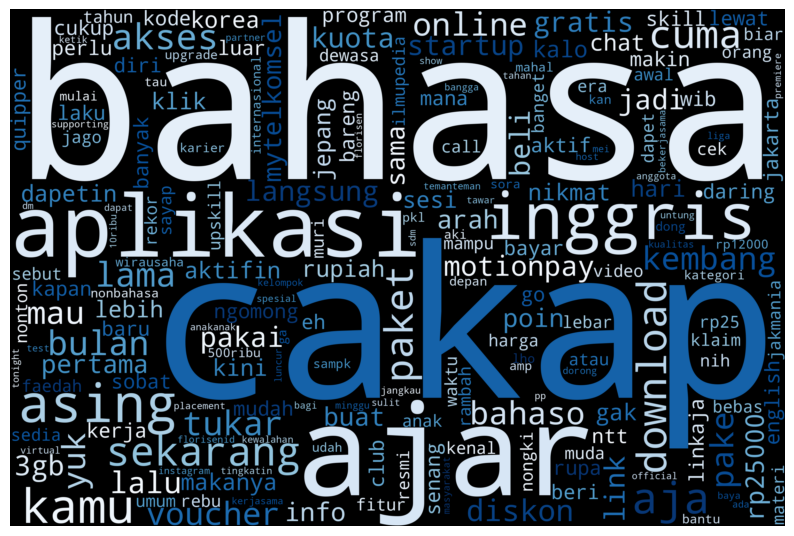

In [35]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

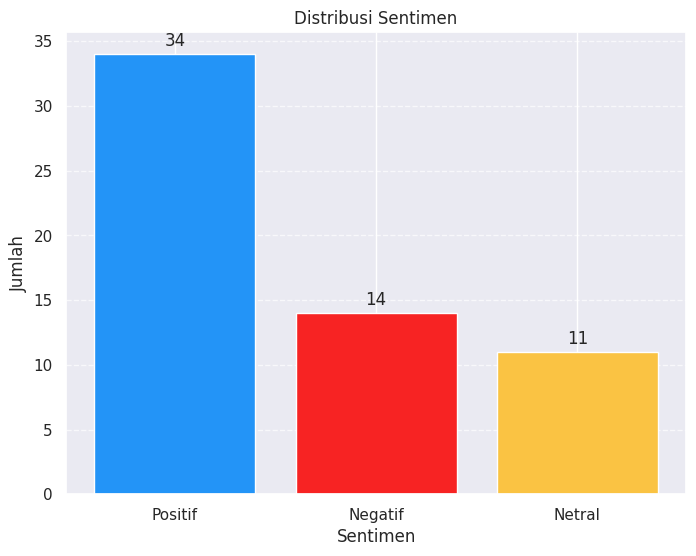

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")

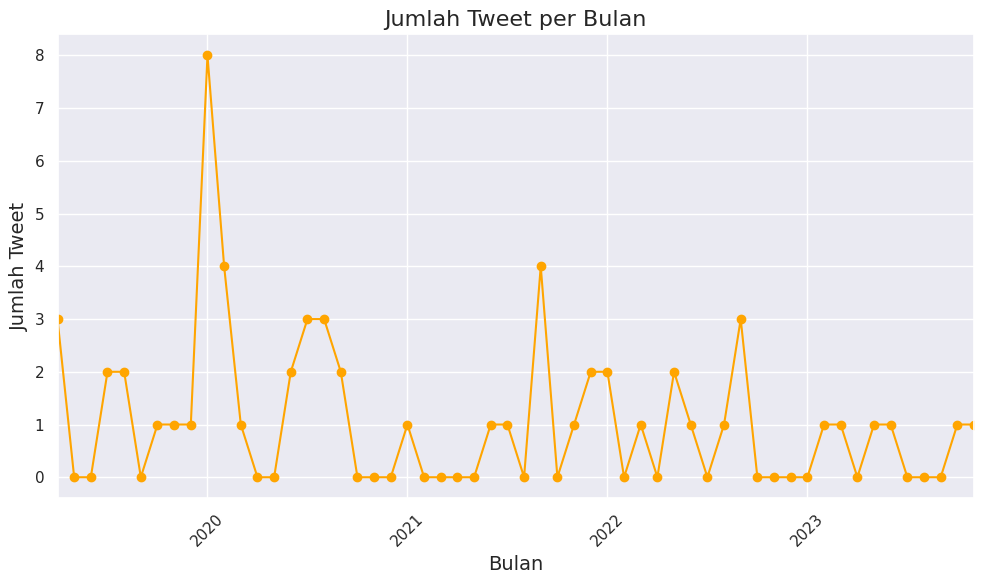

In [37]:
# Time Series Visualization

# Ubah 'created_at' menjadi tipe data datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Set 'created_at' sebagai index
df.set_index('created_at', inplace=True)

# Agregasi data berdasarkan bulan
tweets_per_month = df.resample('M').size()

# Visualisasi time series
plt.figure(figsize=(10, 6))
tweets_per_month.plot(color='Orange', marker='o', linestyle='-')
plt.title('Jumlah Tweet per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7. KLASIFIKASI SENTIMEN**

In [38]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [39]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if (n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [40]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.847457627118644


In [41]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 41
Netral = 8
Negatif = 10

Total Data : 59


In [42]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,hari pp the jakmania bekerjasama cakap aplikas...,day pp the jakmania cooperates proficiently vi...,Negatif,Positif
1,ada kerjasama florisen bagi 1400 voucher ajar ...,there is florisen cooperation for 1400 free fo...,Positif,Positif
2,bangga umum official supporting partner liga b...,proud of the general official supporting partn...,Positif,Positif
3,host kewalahan nih anak jago bahasa inggris un...,"the host is overwhelmed, the child is a champi...",Positif,Positif
4,mau ajar bahasa asing mana aja kapan aja pake ...,want to teach any foreign language at any time...,Negatif,Negatif
5,mau ajar bahasa asing mana aja kapan aja aktif...,want to teach any foreign language at any time...,Negatif,Negatif
6,cakap luncur fitur ajar bahasa jepang kelompok...,skateboarding japanese tutoring feature price ...,Negatif,Negatif
7,startup cakap dorong masyarakat ntt tingkat ma...,startups say encourage people to be able to sp...,Positif,Positif
8,chit chat with and old exol shes follow them s...,chit chat with and old exol shes follow them s...,Positif,Positif
9,kerja sama aplikasi cakap organisasi ntt muda ...,cooperation application talk organization ntt ...,Positif,Positif


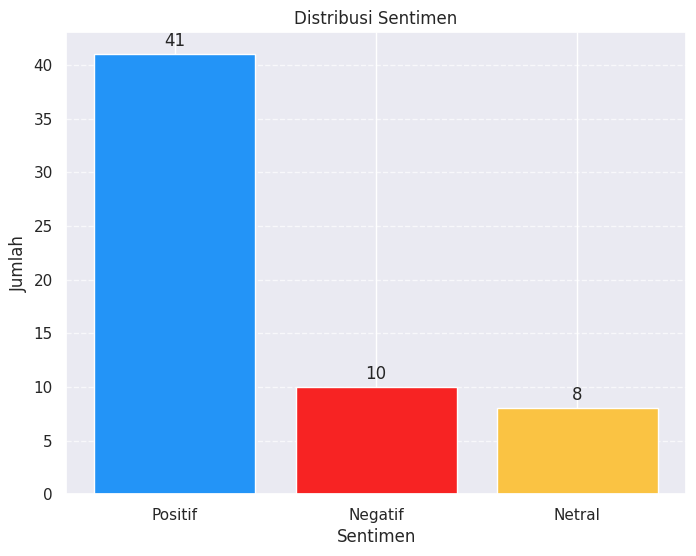

In [43]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen")

In [44]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen")

Text: hari pp the jakmania bekerjasama cakap aplikasi ajar virtual program pertama bahasa inggris tingkatin kualitas sdm anggota the jakmania biar tahan era sulit sekarang
Classifier: Negatif
Classifier Bayes: Positif 

Text: overthinking jadi insecure garagara kurang pede ngomong bahasa inggris yuk ajar bahasa inggris aja sama cakap dapetin voucher gratis cakap english 1 bulan cuma dgn redeem 150 apoin download aplikasi alfagift google play amp app store
Classifier: Negatif
Classifier Bayes: Positif 

Text: ajar bahasa inggris jadi lebih senang beli paket ajar cakap english club aplikasi linkaja soal kamu cuma bayar rp12000 aja lho sampk laku
Classifier: Netral
Classifier Bayes: Positif 

Text: teuku ardo beri voucher diskon 25 ajar bahasa asing cakap pakai kode teucakap6396 nikmat diskon download aplikasi cakap klik link
Classifier: Positif
Classifier Bayes: Negatif 

Text: pake aplikasi cakap buat ajar bahasa korea pake aja nih langsung claim aja
Classifier: Netral
Classifier Bayes: